In [34]:
import nltk
import pandas as pd
import string as str
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import os
import codecs
#from wordcloud import WordCloud
%matplotlib inline

# Load data

In [2]:
df = pd.read_csv('Toner_updated2222.csv')
df
#words=df.split()
#print(words[:100])

,tag,patterns,responses
0,Hardware_New_Toner,"""My printer is not capable of printing documents""","""Ok ,You want to order new toner or lnk ,What ..."
1,Hardware_New_Toner,"""My printer does not print papers""","""Ok ,You want to order new toner or lnk ,What ..."
2,Hardware_New_Toner,"""I think the lnk is empty""","""Ok ,You want to order new toner or lnk ,What ..."
3,Hardware_New_Toner,"""I believe the lnk is empty""","""Ok ,You want to order new toner or lnk ,What ..."
4,Hardware_New_Toner,"""The lnk appears to be empty""","""Ok ,You want to order new toner or lnk ,What ..."
...,...,...,...
273,"""contact_information2""","""badge""","""your email id please"""
274,"""contact information3""","""em""","""ok now i need some information about your loc..."
275,"""location1""","""building""","""ok, the floor number?"""
276,"""location2""","""floor""","""room number?"""


In [3]:
len(df)

278

In [4]:
df.shape

(278, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        278 non-null    object
 1   patterns   278 non-null    object
 2   responses  278 non-null    object
dtypes: object(3)
memory usage: 6.6+ KB


In [6]:
df.isna().sum()

tag          0
patterns     0
responses    0
dtype: int64

# Preprocessing

Stop Words

In [7]:
import nltk
from nltk.corpus import stopwords
#Store the stop words in varible (stop_set)
stop_set= print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
def clean_text(text):

    
    text = re.sub("", text)
    text = re.sub('?', text)
    text = re.sub("!", text)
    text = re.sub("\n", " ", text)
    # removing unnecessary spaces
    text = re.sub(' +', ' ', text)  

    return text.strip()
    

stemmed the words

In [55]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

# choose some words to be stemmed
words = ['tag', 'greeting', 'goodbye', 'thanks', 'noanswer', 'catagory', 'software', 'subcatagory', 'software', 'hardware', 'new', 'printer', 'hardware', 'new', 'printer', 'justification', 'subject', 'new', 'email', 'description', 'new', 'email', 'item', 'hardware', 'new', 'toner', 'hardware', 'new', 'toner', 'color', 'hardware', 'new', 'toner', 'isd', 'hardware', 'new', 'toner', 'printer', 'model', 'names', 'contact', 'information', 'contact', 'information', 'contact', 'information', 'iii', 'location', 'location', 'location', 'iii', 'patterns', 'hi', 'anyone', 'hey', 'hola', 'hello', 'good', 'day', 'bye', 'see', 'later', 'goodbye', 'thanks', 'thank', 'helpful', 'awesome', 'thanks', 'thanks', 'helping', 'information', 'problem', 'software', 'software', 'work', 'open', 'software', 'issue', 'software', 'software', 'broken', 'trouble', 'software', 'install', 'software', 'application', 'uninstall', 'software', 'application', 'evaluation', 'software', 'application', 'upgred', 'software', 'application', 'need', 'new', 'printer', 'dont', 'printer', 'office', 'printer', 'needing', 'new', 'printer', 'could', 'please', 'give', 'printer', 'printer', 'dont', 'email', 'need', 'email', 'need', 'new', 'email', 'new', 'email', 'create', 'new', 'mail', 'new', 'employee', 'email', 'new', 'organizer', 'email', 'moved', 'department', 'another', 'need', 'new', 'email', 'received', 'email', 'yet', 'department', 'email', 'user', 'email', 'email', 'srevices', 'printer', 'print', 'papers', 'thank', 'lnk', 'empty', 'printer', 'toner', 'printer', 'lnk', 'ink', 'empty', 'toner', 'empty', 'order', 'new', 'lnk', 'order', 'new', 'toner', 'order', 'new', 'black', 'lnk', 'order', 'new', 'black', 'toner', 'request', 'new', 'toner', 'black', 'lnk', 'black', 'toner', 'color', 'black', 'need', 'colors', 'need', 'red', 'blue', 'need', 'black', 'blue', 'isd', 'printer', 'model', 'nawaf', 'almutairi', 'ahmad', 'alharthi', 'faisal', 'alsufyani', 'surayyi', 'alqahtani', 'shoug', 'alkhathran', 'extension', 'badge', 'building', 'floor', 'room', 'responses', 'hello', 'helpppppp', 'hi', 'problem', 'nice', 'day', 'welcome', 'bye', 'happy', 'help', 'time', 'pleasure', 'sorry', 'understand', 'please', 'give', 'info', 'sure', 'understand', 'kind', 'software', 'issue', 'need', 'medical', 'application', 'services', 'need', 'mobile', 'application', 'services', 'need', 'medical', 'services', 'ok', 'need', 'contact', 'information', 'please', 'ok', 'sure', 'justification', 'ordering', 'printer', 'ok', 'may', 'know', 'justification', 'requesting', 'printer', 'ok', 'problem', 'give', 'information', 'please', 'ok', 'give', 'description', 'need', 'create', 'new', 'mail', 'please', 'fine', 'item', 'need', 'department', 'email', 'user', 'email', 'email', 'srevices', 'ok', 'ok', 'order', 'new', 'toner', 'lnk', 'kind', 'color', 'sure', 'order', 'new', 'toner', 'lnk', 'kind', 'color', 'order', 'toner', 'recorded', 'jest', 'ask', 'isd', 'ok', 'printer', 'model', 'ok', 'got', 'need', 'informations', 'please', 'ok', 'extension', 'number', 'please', 'allright', 'badge', 'number', 'email', 'id', 'please', 'ok', 'need', 'information', 'location', 'give', 'building', 'please', 'ok', 'floor', 'number', 'room', 'number', 'ok', 'got', 'add', 'request', 'thank']

for w in words:
    print(w, " : ", ps.stem(w))


tag  :  tag
greeting  :  greet
goodbye  :  goodby
thanks  :  thank
noanswer  :  noanswer
catagory  :  catagori
software  :  softwar
subcatagory  :  subcatagori
software  :  softwar
hardware  :  hardwar
new  :  new
printer  :  printer
hardware  :  hardwar
new  :  new
printer  :  printer
justification  :  justif
subject  :  subject
new  :  new
email  :  email
description  :  descript
new  :  new
email  :  email
item  :  item
hardware  :  hardwar
new  :  new
toner  :  toner
hardware  :  hardwar
new  :  new
toner  :  toner
color  :  color
hardware  :  hardwar
new  :  new
toner  :  toner
isd  :  isd
hardware  :  hardwar
new  :  new
toner  :  toner
printer  :  printer
model  :  model
names  :  name
contact  :  contact
information  :  inform
contact  :  contact
information  :  inform
contact  :  contact
information  :  inform
iii  :  iii
location  :  locat
location  :  locat
location  :  locat
iii  :  iii
patterns  :  pattern
hi  :  hi
anyone  :  anyon
hey  :  hey
hola  :  hola
hello  :  hell

word lemmatization

In [56]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

list1 = ['tag', 'greeting', 'goodbye', 'thanks', 'noanswer', 'catagory', 'software', 'subcatagory', 'software', 'hardware', 'new', 'printer', 'hardware', 'new', 'printer', 'justification', 'subject', 'new', 'email', 'description', 'new', 'email', 'item', 'hardware', 'new', 'toner', 'hardware', 'new', 'toner', 'color', 'hardware', 'new', 'toner', 'isd', 'hardware', 'new', 'toner', 'printer', 'model', 'names', 'contact', 'information', 'contact', 'information', 'contact', 'information', 'iii', 'location', 'location', 'location', 'iii', 'patterns', 'hi', 'anyone', 'hey', 'hola', 'hello', 'good', 'day', 'bye', 'see', 'later', 'goodbye', 'thanks', 'thank', 'helpful', 'awesome', 'thanks', 'thanks', 'helping', 'information', 'problem', 'software', 'software', 'work', 'open', 'software', 'issue', 'software', 'software', 'broken', 'trouble', 'software', 'install', 'software', 'application', 'uninstall', 'software', 'application', 'evaluation', 'software', 'application', 'upgred', 'software', 'application', 'need', 'new', 'printer', 'dont', 'printer', 'office', 'printer', 'needing', 'new', 'printer', 'could', 'please', 'give', 'printer', 'printer', 'dont', 'email', 'need', 'email', 'need', 'new', 'email', 'new', 'email', 'create', 'new', 'mail', 'new', 'employee', 'email', 'new', 'organizer', 'email', 'moved', 'department', 'another', 'need', 'new', 'email', 'received', 'email', 'yet', 'department', 'email', 'user', 'email', 'email', 'srevices', 'printer', 'print', 'papers', 'thank', 'lnk', 'empty', 'printer', 'toner', 'printer', 'lnk', 'ink', 'empty', 'toner', 'empty', 'order', 'new', 'lnk', 'order', 'new', 'toner', 'order', 'new', 'black', 'lnk', 'order', 'new', 'black', 'toner', 'request', 'new', 'toner', 'black', 'lnk', 'black', 'toner', 'color', 'black', 'need', 'colors', 'need', 'red', 'blue', 'need', 'black', 'blue', 'isd', 'printer', 'model', 'nawaf', 'almutairi', 'ahmad', 'alharthi', 'faisal', 'alsufyani', 'surayyi', 'alqahtani', 'shoug', 'alkhathran', 'extension', 'badge', 'building', 'floor', 'room', 'responses', 'hello', 'helpppppp', 'hi', 'problem', 'nice', 'day', 'welcome', 'bye', 'happy', 'help', 'time', 'pleasure', 'sorry', 'understand', 'please', 'give', 'info', 'sure', 'understand', 'kind', 'software', 'issue', 'need', 'medical', 'application', 'services', 'need', 'mobile', 'application', 'services', 'need', 'medical', 'services', 'ok', 'need', 'contact', 'information', 'please', 'ok', 'sure', 'justification', 'ordering', 'printer', 'ok', 'may', 'know', 'justification', 'requesting', 'printer', 'ok', 'problem', 'give', 'information', 'please', 'ok', 'give', 'description', 'need', 'create', 'new', 'mail', 'please', 'fine', 'item', 'need', 'department', 'email', 'user', 'email', 'email', 'srevices', 'ok', 'ok', 'order', 'new', 'toner', 'lnk', 'kind', 'color', 'sure', 'order', 'new', 'toner', 'lnk', 'kind', 'color', 'order', 'toner', 'recorded', 'jest', 'ask', 'isd', 'ok', 'printer', 'model', 'ok', 'got', 'need', 'informations', 'please', 'ok', 'extension', 'number', 'please', 'allright', 'badge', 'number', 'email', 'id', 'please', 'ok', 'need', 'information', 'location', 'give', 'building', 'please', 'ok', 'floor', 'number', 'room', 'number', 'ok', 'got', 'add', 'request', 'thank']
for words in list1:
    print(words + " ---> " + wnl.lemmatize(words))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


tag ---> tag
greeting ---> greeting
goodbye ---> goodbye
thanks ---> thanks
noanswer ---> noanswer
catagory ---> catagory
software ---> software
subcatagory ---> subcatagory
software ---> software
hardware ---> hardware
new ---> new
printer ---> printer
hardware ---> hardware
new ---> new
printer ---> printer
justification ---> justification
subject ---> subject
new ---> new
email ---> email
description ---> description
new ---> new
email ---> email
item ---> item
hardware ---> hardware
new ---> new
toner ---> toner
hardware ---> hardware
new ---> new
toner ---> toner
color ---> color
hardware ---> hardware
new ---> new
toner ---> toner
isd ---> isd
hardware ---> hardware
new ---> new
toner ---> toner
printer ---> printer
model ---> model
names ---> name
contact ---> contact
information ---> information
contact ---> contact
information ---> information
contact ---> contact
information ---> information
iii ---> iii
location ---> location
location ---> location
location ---> location
iii

### remove numbers, captial letters

In [9]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

df['tag'] = df.tag.map(alphanumeric).map(punc_lower)
df['patterns'] = df.patterns.map(alphanumeric).map(punc_lower)
df['responses'] = df.responses.map(alphanumeric).map(punc_lower)


df.head(23)

,tag,patterns,responses
0,hardware new toner,my printer is not capable of printing documents,ok you want to order new toner or lnk what ...
1,hardware new toner,my printer does not print papers,ok you want to order new toner or lnk what ...
2,hardware new toner,i think the lnk is empty,ok you want to order new toner or lnk what ...
3,hardware new toner,i believe the lnk is empty,ok you want to order new toner or lnk what ...
4,hardware new toner,the lnk appears to be empty,ok you want to order new toner or lnk what ...
5,hardware new toner,i believe the lnk is unfilled,ok you want to order new toner or lnk what ...
6,hardware new toner,my printer does not have a toner cartridge,ok you want to order new toner or lnk what ...
7,hardware new toner,my printer does not have a toner,ok you want to order new toner or lnk what ...
8,hardware new toner,my printer does not have a lnk,ok you want to order new toner or lnk what ...
9,hardware new toner,my printer lacks a lnk,ok you want to order new toner or lnk what ...


In [10]:
def remove_stopwords(text):

    stop=stopwords['stop_set'].tolist()
    text_list = text.split(' ')  # to remove stopwords easily  
    new_text_list = []
   
    for s in text_list:
        if not (s in stop) and not(s in stop_set): #Checks two lists
            new_text_list.append(s)
        
    text = ' '.join(e for e in new_text_list)  # gather text together again

    return text

In [11]:
df.tag.value_counts(normalize=True)

 catagory software                      0.219424
 hardware new printer                   0.194245
 subcatagory software                   0.100719
 hardware new printer justification     0.100719
hardware new toner                      0.100719
hardware new toner color                0.082734
 subject new email                      0.082734
 greeting                               0.032374
 names                                  0.017986
 thanks                                 0.017986
                                        0.014388
 goodbye                                0.010791
 item                                   0.010791
 contact                                0.007194
hardware new toner printer model        0.003597
hardware new toner isd name             0.003597
Name: tag, dtype: float64

# WordCloud after clean

In [57]:
raw_text="tag,greeting goodbye thanks noanswer catagory_software subcatagory_software Hardware_New_Printer Hardware_New_Printer_Justification Subject_New_Email Description_New_Email Item Hardware_New_Toner Hardware_New_Toner_Color Hardware_New_Toner_ISD_Name Hardware_New_Toner_Printer_Model Names contact_information contact_information_II contact_information_III location location_II location_III,Patterns, Hi there, How are you, Is anyone there?,Hey,Hola, Hello, Good day Bye, See you later, Goodbye Thanks, Thank you, That's helpful, Awesome, thanks, Thanks for helping me there is no information here I have a problem with the software, the software does not work, I can't open the software, I have an issue with the software, the software is broken, I have a trouble with the software install a software application,uninstall a software application,evaluation a software application,upgred a software application I need new printer, I dont have printer on my office, I want printer, needing for new printer, Could you please give my printer?, can I have printer? I dont have one I don't have an email, I need an email, I need a new email, I want a new email, Can you create a new mail for me?  I'm a new employee and I don't have an email, I'm a new organizer and I don't have an email, I have been moved from one department to another and I need a new email, I have not received an email yet Department email, user email, email srevices My printer does not print papers, I thank the lnk is empty, My printer does not have a toner, My printer does not have a lnk,My ink is empty,My toner is empty,I want to order new lnk,I want to order new toner,I want to order new black lnk,I want to order new black toner,I want to request a new toner I want a black lnk, I want a black toner, the color is black, I need all colors, I need a red and blue, I need a black and blue My ISD Name is ... My printer model is .. Nawaf Almutairi,Ahmad Alharthi,Faisal Alsufyani,Surayyi Alqahtani,Shoug Alkhathran extension badge em building floor room,,responses, Hello,how can I helpppppp?,hi,what is your problem? Have a nice day, Your welcome, bye Happy to help!, Any time!, My pleasure Sorry, can't understand you, Please give me more info, Not sure I understand What kind of the software issue you have?,do you need a medical application services,do you need mobile application services,do you need non medical services Ok I need your contact information please, what is your name? ok sure, what is your justification for ordering the printer?, ok, May I know your justification for requesting the printer? ok no problem, give me your information please, what is your name? ok , Give me a description of your need to create a new mail please Fine, What item do you need? is it Department email or user email or email srevices? ok, what is your name? Ok ,You want to order new toner or lnk ,What kind of color?, Sure i will do that, You want to order new toner or lnk ,What kind of color? your order of toner is recorded, jest I want to ask you what is the ISD name Ok , What is your printer model? Ok I got that, now I need some informations please, what is your name? ok, your extension number please? allright!,your badge Number! your email id please ok now i need some information about your location, give me your building name please? ok, the floor number? room number? ok I got that, now I will Add a Request for you,thank "


In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

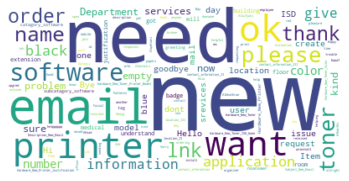

<Figure size 432x288 with 0 Axes>

In [63]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(raw_text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('nlp.png',dpi=150)


### The second document-term matrix has both unigrams and bigrams, and indicators instead of counts


# CountVectorization

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
#CV = vectorizer.fit_transform(df['tag'])
CV = vectorizer.fit_transform(df['patterns'])
#CV = vectorizer.fit_transform(df['responses'])
CV.shape

(278, 221)

In [15]:
df_cv = pd.DataFrame(CV.toarray(),columns = vectorizer.get_feature_names())
df_cv

,access,account,address,ahmad,alharthi,alkhathran,all,almutairi,alqahtani,alsufyani,...,without,won,work,working,workplace,works,would,yellow,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


CountVectorization Using (1, 2) Grams

In [16]:
CV_grams = CountVectorizer(stop_words= stop_set, ngram_range = (1,2))
CV_grams_ = CV_grams.fit_transform(df['patterns'])
CV_grams_ = CV_grams.fit_transform(df['responses'])
CV_grams_.shape

(278, 185)

In [17]:
df_grams = pd.DataFrame(CV_grams_.toarray(),columns = CV_grams.get_feature_names())
df_grams

,about,about your,add,add request,allright,allright your,ask,ask you,badge,badge number,...,your building,your contact,your email,your extension,your information,your justification,your location,your name,your order,your printer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
274,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TfidfVectorizer Using (1, 2) Grams

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
CV_TF_IDF = TfidfVectorizer(stop_words= stop_set,ngram_range = (1,2))
CV_TF_IDF_ = CV_TF_IDF.fit_transform(df['patterns'])
CV_TF_IDF_ = CV_TF_IDF.fit_transform(df['responses'])
CV_TF_IDF_.shape

(278, 185)

In [19]:
df_tf = pd.DataFrame(CV_TF_IDF_.toarray(),columns = CV_TF_IDF.get_feature_names())
df_tf

,about,about your,add,add request,allright,allright your,ask,ask you,badge,badge number,...,your building,your contact,your email,your extension,your information,your justification,your location,your name,your order,your printer
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.467702,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
274,0.238247,0.238247,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.238247,0.0,0.000000,0.0,0.0,0.0,0.238247,0.0,0.0,0.0
275,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
276,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# Topic modeling

Latent Semantic Analysis (LSA)

In [20]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(2)
CV= lsa.fit_transform(CV)
lsa.explained_variance_ratio_

array([0.08396576, 0.08986626])

In [21]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["cluster_1","cluster_2"],
             columns = vectorizer.get_feature_names())
topic_word

,access,account,address,ahmad,alharthi,alkhathran,all,almutairi,alqahtani,alsufyani,...,without,won,work,working,workplace,works,would,yellow,you,your
cluster_1,0.007,0.002,0.028,0.0,0.0,0.0,0.002,-0.0,-0.0,0.0,...,0.010,0.004,0.014,0.030,0.007,0.001,0.080,0.001,0.038,0.002
cluster_2,0.016,0.002,0.004,-0.0,-0.0,-0.0,0.006,-0.0,-0.0,-0.0,...,-0.004,0.020,0.017,0.084,0.001,0.004,-0.032,0.000,-0.008,0.001


In [22]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [29]:
display_topics(lsa, vectorizer.get_feature_names(),10)


Topic  0
printer, my, office, new, is, in, to, have, me, for

Topic  1
software, the, is, with, to, problem, me, application, there, working


LSA and TfidfVectorize

In [30]:
lsa = TruncatedSVD(n_components=4, random_state=None)
lsa.fit(CV_TF_IDF_)

TruncatedSVD(n_components=4)

In [32]:
display_topics(model=lsa, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=20)


Topic  0
the, the software, software issue, issue you, software, issue, you have, of the, have, kind, kind of, what kind, of, what, you, your, is your, ok, what is, is

Topic  1
your, is your, ok sure, sure, your justification, justification, sure what, ordering, the printer, ordering the, justification for, for ordering, what is, printer, for, is, ok, information please, please what, your name

Topic  2
information please, your name, please what, information, please, your, name, ok need, need your, contact information, contact, your contact, need, your information, ok no, no, problem give, no problem, problem, give

Topic  3
toner, want, want to, order, to, or, or lnk, you want, toner or, color, order new, ok you, to order, lnk, lnk what, new toner, new, of color, you, email


# K-Means

In [76]:
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [77]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 4.441231077246057
2 : 2.354389556119529
3 : 1.7366418570126152
4 : 1.2217018922860146
5 : 1.1559007158312278
6 : 1.0930270041072951
7 : 1.0293666028467707
8 : 0.9698732472489521
9 : 0.9202519170655769


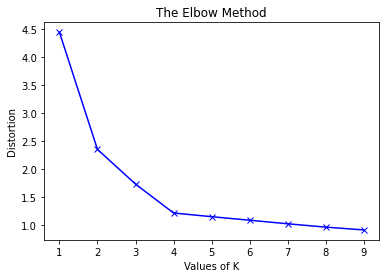

In [78]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [79]:
from  sklearn.cluster import KMeans

In [80]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

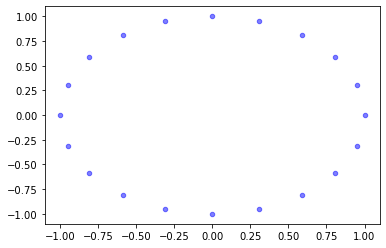

In [81]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

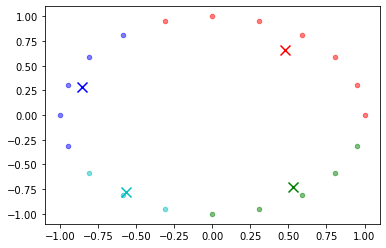

In [82]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

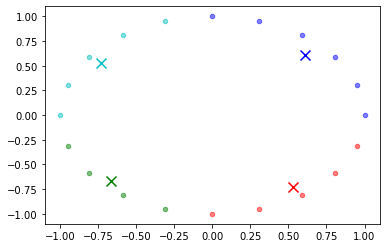

In [83]:
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

Determining optimium number of clusters

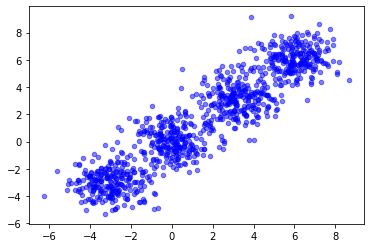

In [50]:
from sklearn.datasets import make_blobs
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

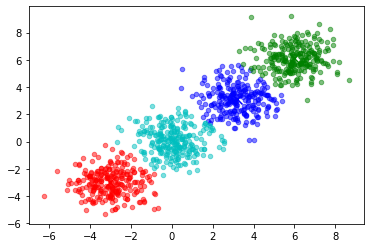

In [51]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

### clean 

In [ ]:
my_text= "tag Hardware_New_Toner Hardware_New_Toner Hardware_New_Toner Hardware_New_Toner Hardware_New_Toner Hardware_New_Toner Hardware_New_Toner Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner
Hardware_New_Toner Hardware_New_Toner Hardware_New_Toner Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_Color Hardware_New_Toner_ISD_Name Hardware_New_Toner_Printer_Model
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"catagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"subcatagory_software"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Hardware_New_Printer_Justification"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Subject_New_Email"
"Item"
"Item"
"Item"
"greeting"
"greeting"
"greeting"
"greeting"
"greeting"
"greeting"
"greeting"
"greeting"
"greeting"
"goodbye"
"goodbye"
"goodbye"
"thanks"
"thanks"
"thanks"
"thanks"
"thanks"
"Names"
"Names"
"Names"
"Names"
"Names"
"contact information1"
"contact_information2"
"contact information3"
"location1"
"location2"
"location3"
 "

In [ ]:
my=df

In [ ]:
import re
import string

clean_text=re.sub('[%s]' %re.escape(string.punctuation),' ',df)
clean_text

In [ ]:
clean_text=clean_text.lower()
clean_text

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


### removing stopwords

In [ ]:

text_tokens = word_tokenize(clean_text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

### stemmed the words  

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

# choose some words to be stemmed
words = ['tag', 'greeting', 'goodbye', 'thanks', 'noanswer', 'catagory', 'software', 'subcatagory', 'software', 'hardware', 'new', 'printer', 'hardware', 'new', 'printer', 'justification', 'subject', 'new', 'email', 'description', 'new', 'email', 'item', 'hardware', 'new', 'toner', 'hardware', 'new', 'toner', 'color', 'hardware', 'new', 'toner', 'isd', 'hardware', 'new', 'toner', 'printer', 'model', 'names', 'contact', 'information', 'contact', 'information', 'contact', 'information', 'iii', 'location', 'location', 'location', 'iii', 'patterns', 'hi', 'anyone', 'hey', 'hola', 'hello', 'good', 'day', 'bye', 'see', 'later', 'goodbye', 'thanks', 'thank', 'helpful', 'awesome', 'thanks', 'thanks', 'helping', 'information', 'problem', 'software', 'software', 'work', 'open', 'software', 'issue', 'software', 'software', 'broken', 'trouble', 'software', 'install', 'software', 'application', 'uninstall', 'software', 'application', 'evaluation', 'software', 'application', 'upgred', 'software', 'application', 'need', 'new', 'printer', 'dont', 'printer', 'office', 'printer', 'needing', 'new', 'printer', 'could', 'please', 'give', 'printer', 'printer', 'dont', 'email', 'need', 'email', 'need', 'new', 'email', 'new', 'email', 'create', 'new', 'mail', 'new', 'employee', 'email', 'new', 'organizer', 'email', 'moved', 'department', 'another', 'need', 'new', 'email', 'received', 'email', 'yet', 'department', 'email', 'user', 'email', 'email', 'srevices', 'printer', 'print', 'papers', 'thank', 'lnk', 'empty', 'printer', 'toner', 'printer', 'lnk', 'ink', 'empty', 'toner', 'empty', 'order', 'new', 'lnk', 'order', 'new', 'toner', 'order', 'new', 'black', 'lnk', 'order', 'new', 'black', 'toner', 'request', 'new', 'toner', 'black', 'lnk', 'black', 'toner', 'color', 'black', 'need', 'colors', 'need', 'red', 'blue', 'need', 'black', 'blue', 'isd', 'printer', 'model', 'nawaf', 'almutairi', 'ahmad', 'alharthi', 'faisal', 'alsufyani', 'surayyi', 'alqahtani', 'shoug', 'alkhathran', 'extension', 'badge', 'building', 'floor', 'room', 'responses', 'hello', 'helpppppp', 'hi', 'problem', 'nice', 'day', 'welcome', 'bye', 'happy', 'help', 'time', 'pleasure', 'sorry', 'understand', 'please', 'give', 'info', 'sure', 'understand', 'kind', 'software', 'issue', 'need', 'medical', 'application', 'services', 'need', 'mobile', 'application', 'services', 'need', 'medical', 'services', 'ok', 'need', 'contact', 'information', 'please', 'ok', 'sure', 'justification', 'ordering', 'printer', 'ok', 'may', 'know', 'justification', 'requesting', 'printer', 'ok', 'problem', 'give', 'information', 'please', 'ok', 'give', 'description', 'need', 'create', 'new', 'mail', 'please', 'fine', 'item', 'need', 'department', 'email', 'user', 'email', 'email', 'srevices', 'ok', 'ok', 'order', 'new', 'toner', 'lnk', 'kind', 'color', 'sure', 'order', 'new', 'toner', 'lnk', 'kind', 'color', 'order', 'toner', 'recorded', 'jest', 'ask', 'isd', 'ok', 'printer', 'model', 'ok', 'got', 'need', 'informations', 'please', 'ok', 'extension', 'number', 'please', 'allright', 'badge', 'number', 'email', 'id', 'please', 'ok', 'need', 'information', 'location', 'give', 'building', 'please', 'ok', 'floor', 'number', 'room', 'number', 'ok', 'got', 'add', 'request', 'thank']

for w in words:
    print(w, " : ", ps.stem(w))


### word lemmatization 

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

list1 = ['tag', 'greeting', 'goodbye', 'thanks', 'noanswer', 'catagory', 'software', 'subcatagory', 'software', 'hardware', 'new', 'printer', 'hardware', 'new', 'printer', 'justification', 'subject', 'new', 'email', 'description', 'new', 'email', 'item', 'hardware', 'new', 'toner', 'hardware', 'new', 'toner', 'color', 'hardware', 'new', 'toner', 'isd', 'hardware', 'new', 'toner', 'printer', 'model', 'names', 'contact', 'information', 'contact', 'information', 'contact', 'information', 'iii', 'location', 'location', 'location', 'iii', 'patterns', 'hi', 'anyone', 'hey', 'hola', 'hello', 'good', 'day', 'bye', 'see', 'later', 'goodbye', 'thanks', 'thank', 'helpful', 'awesome', 'thanks', 'thanks', 'helping', 'information', 'problem', 'software', 'software', 'work', 'open', 'software', 'issue', 'software', 'software', 'broken', 'trouble', 'software', 'install', 'software', 'application', 'uninstall', 'software', 'application', 'evaluation', 'software', 'application', 'upgred', 'software', 'application', 'need', 'new', 'printer', 'dont', 'printer', 'office', 'printer', 'needing', 'new', 'printer', 'could', 'please', 'give', 'printer', 'printer', 'dont', 'email', 'need', 'email', 'need', 'new', 'email', 'new', 'email', 'create', 'new', 'mail', 'new', 'employee', 'email', 'new', 'organizer', 'email', 'moved', 'department', 'another', 'need', 'new', 'email', 'received', 'email', 'yet', 'department', 'email', 'user', 'email', 'email', 'srevices', 'printer', 'print', 'papers', 'thank', 'lnk', 'empty', 'printer', 'toner', 'printer', 'lnk', 'ink', 'empty', 'toner', 'empty', 'order', 'new', 'lnk', 'order', 'new', 'toner', 'order', 'new', 'black', 'lnk', 'order', 'new', 'black', 'toner', 'request', 'new', 'toner', 'black', 'lnk', 'black', 'toner', 'color', 'black', 'need', 'colors', 'need', 'red', 'blue', 'need', 'black', 'blue', 'isd', 'printer', 'model', 'nawaf', 'almutairi', 'ahmad', 'alharthi', 'faisal', 'alsufyani', 'surayyi', 'alqahtani', 'shoug', 'alkhathran', 'extension', 'badge', 'building', 'floor', 'room', 'responses', 'hello', 'helpppppp', 'hi', 'problem', 'nice', 'day', 'welcome', 'bye', 'happy', 'help', 'time', 'pleasure', 'sorry', 'understand', 'please', 'give', 'info', 'sure', 'understand', 'kind', 'software', 'issue', 'need', 'medical', 'application', 'services', 'need', 'mobile', 'application', 'services', 'need', 'medical', 'services', 'ok', 'need', 'contact', 'information', 'please', 'ok', 'sure', 'justification', 'ordering', 'printer', 'ok', 'may', 'know', 'justification', 'requesting', 'printer', 'ok', 'problem', 'give', 'information', 'please', 'ok', 'give', 'description', 'need', 'create', 'new', 'mail', 'please', 'fine', 'item', 'need', 'department', 'email', 'user', 'email', 'email', 'srevices', 'ok', 'ok', 'order', 'new', 'toner', 'lnk', 'kind', 'color', 'sure', 'order', 'new', 'toner', 'lnk', 'kind', 'color', 'order', 'toner', 'recorded', 'jest', 'ask', 'isd', 'ok', 'printer', 'model', 'ok', 'got', 'need', 'informations', 'please', 'ok', 'extension', 'number', 'please', 'allright', 'badge', 'number', 'email', 'id', 'please', 'ok', 'need', 'information', 'location', 'give', 'building', 'please', 'ok', 'floor', 'number', 'room', 'number', 'ok', 'got', 'add', 'request', 'thank']
for words in list1:
    print(words + " ---> " + wnl.lemmatize(words))




In [ ]:
pip install ner

In [ ]:
pip install ner-d

In [ ]:
pip install spacy

In [ ]:
pip install -U spacy

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

In [ ]:
file_name = 'nlp all words.txt'
introduction_file_text = open(file_name).read()
introduction_file_doc = nlp(introduction_file_text)
# Extract tokens for the given doc
print ([token.text for token in introduction_file_doc])


In [ ]:
spacy.explain("ORG")

In [ ]:
spacy.explain("GPE")


In [ ]:
raw_text="tag,greeting goodbye thanks noanswer catagory_software subcatagory_software Hardware_New_Printer Hardware_New_Printer_Justification Subject_New_Email Description_New_Email Item Hardware_New_Toner Hardware_New_Toner_Color Hardware_New_Toner_ISD_Name Hardware_New_Toner_Printer_Model Names contact_information contact_information_II contact_information_III location location_II location_III,Patterns, Hi there, How are you, Is anyone there?,Hey,Hola, Hello, Good day Bye, See you later, Goodbye Thanks, Thank you, That's helpful, Awesome, thanks, Thanks for helping me there is no information here I have a problem with the software, the software does not work, I can't open the software, I have an issue with the software, the software is broken, I have a trouble with the software install a software application,uninstall a software application,evaluation a software application,upgred a software application I need new printer, I dont have printer on my office, I want printer, needing for new printer, Could you please give my printer?, can I have printer? I dont have one I don't have an email, I need an email, I need a new email, I want a new email, Can you create a new mail for me?  I'm a new employee and I don't have an email, I'm a new organizer and I don't have an email, I have been moved from one department to another and I need a new email, I have not received an email yet Department email, user email, email srevices My printer does not print papers, I thank the lnk is empty, My printer does not have a toner, My printer does not have a lnk,My ink is empty,My toner is empty,I want to order new lnk,I want to order new toner,I want to order new black lnk,I want to order new black toner,I want to request a new toner I want a black lnk, I want a black toner, the color is black, I need all colors, I need a red and blue, I need a black and blue My ISD Name is ... My printer model is .. Nawaf Almutairi,Ahmad Alharthi,Faisal Alsufyani,Surayyi Alqahtani,Shoug Alkhathran extension badge em building floor room,,responses, Hello,how can I helpppppp?,hi,what is your problem? Have a nice day, Your welcome, bye Happy to help!, Any time!, My pleasure Sorry, can't understand you, Please give me more info, Not sure I understand What kind of the software issue you have?,do you need a medical application services,do you need mobile application services,do you need non medical services Ok I need your contact information please, what is your name? ok sure, what is your justification for ordering the printer?, ok, May I know your justification for requesting the printer? ok no problem, give me your information please, what is your name? ok , Give me a description of your need to create a new mail please Fine, What item do you need? is it Department email or user email or email srevices? ok, what is your name? Ok ,You want to order new toner or lnk ,What kind of color?, Sure i will do that, You want to order new toner or lnk ,What kind of color? your order of toner is recorded, jest I want to ask you what is the ISD name Ok , What is your printer model? Ok I got that, now I need some informations please, what is your name? ok, your extension number please? allright!,your badge Number! your email id please ok now i need some information about your location, give me your building name please? ok, the floor number? room number? ok I got that, now I will Add a Request for you,thank "


In [ ]:
text1= NER(raw_text)


In [ ]:
for word in text1.ents:
    print(word.text,word.label_)

In [ ]:

displacy.render(text1,style="ent",jupyter=True)


In [ ]:
from nltk.tag import pos_tag
tokens =pos_tag(word_tokenize(clean_text))
print(tokens)

In [ ]:
nltk.help.upenn_tagset()


### The Count Vectorizer values - counts of unigrams


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

### The second document-term matrix has both unigrams and bigrams, and indicators instead of counts


In [ ]:
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

In [ ]:
vectorizer= CountVectorizer()
CV = vectorizer.fit_transform(df['responses'])
CV.shape
# patterns


In [ ]:
pip install tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
CV_TF_IDF = TfidfVectorizer(stop_words= raw_text,ngram_range = (1,2))
CV_TF_IDF_ = CV_TF_IDF.fit_transform(df['clean_text'])
CV_TF_IDF_.shape

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(raw_text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('nlp.png',dpi=150)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
dataset = [
"My printer is not capable of printing documents"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"My printer does not print papers"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I think the lnk is empty"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I believe the lnk is empty"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"The lnk appears to be empty"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I believe the lnk is unfilled"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"My printer does not have a toner cartridge"	"Ok ,You want to order new toner or lnk ,What kind of color?"
 "My printer does not have a toner"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"My printer does not have a lnk"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"My printer lacks a lnk"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"My lnk is empty"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"My toner is empty"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I want to order new lnk"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I'd want to order some new lnk."	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I want to order new toner"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I want to order new black lnk"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I want to order new black toner"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I want to request a new toner"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I'd like to request a replacement toner cartridge"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I'd want to order a new toner cartridge."	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I don't have a toner cartridge for my printer."	"Ok ,You want to order new toner or lnk ,What kind of color?"
"There is no toner cartridge in my printer"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I cannot use my printer because my toner cartridge is empty"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"A toner cartridge is not in my printer"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"My printer lacks a toner cartridge"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"It doesn't have a toner cartridge"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"The toner cartridge for my printer is empty"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"The printer does not have a toner cartridge"	"Ok ,You want to order new toner or lnk ,What kind of color?"
"I want a black lnk"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I want a black toner"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I would like a black lnk"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"Black lnk is what I need"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"It would be nice to have a black lnk"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"Please send me a black lnk"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"It's a black lnk that I want"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"Black is the color"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I need all colors"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I need all the colors"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"All colors are needed"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I need all the colors"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I need a red and blue"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I need both a red and blue"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I want a yellow and blue"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I need a yellow and blue"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I need a black and blue"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I want a black and blue"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I'm looking for a black lnk"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I'd like a black lnk."	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I'd want to have a black lnk"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I'm looking for a black toner"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"I need a black toner"	"your order of toner is recorded, jest I want to ask you what is the ISD name"
"My ISD Name is …"	"Ok , What is your printer model?"
"My printer model is .."	"Ok I got that, now I need some informations please, what is your name?"
"I have a problem with the software"	"What kind of the software issue you have?"
"There is a problem with the software"	"What kind of the software issue you have?"
"The software isn't working for me"	"What kind of the software issue you have?"
"I'm having trouble with the software"     	"What kind of the software issue you have?"
"My software isn't working"	"What kind of the software issue you have?"
"Software is not working for me"	"What kind of the software issue you have?"
"A software issue has arisen"	"What kind of the software issue you have?"
"Software is giving me problems"	"What kind of the software issue you have?"
"Software is causing me problems"	"What kind of the software issue you have?"
"The software I use isn't working for me"	"What kind of the software issue you have?"
"the software does not work"	"What kind of the software issue you have?"
"There is a problem with the software"	"What kind of the software issue you have?"
"Software does not work"	"What kind of the software issue you have?"
"I am unable to use the software"	"What kind of the software issue you have?"
"The software is not working"	"What kind of the software issue you have?"
"Unfortunately, the software doesn't work"	"What kind of the software issue you have?"
"I cannot use the software"	"What kind of the software issue you have?"
"I cannot run the software"	"What kind of the software issue you have?"
"We are experiencing a problem with our software"	"What kind of the software issue you have?"
"No software works"	"What kind of the software issue you have?"
"I can't open the software"	"What kind of the software issue you have?"
"The software won't open"	"What kind of the software issue you have?"
"I am unable to open the software"	"What kind of the software issue you have?"
"I cannot open the software"	"What kind of the software issue you have?"
"Having trouble opening the software"	"What kind of the software issue you have?"
"Open the software I can't"	"What kind of the software issue you have?"
"Opened the software but it won't open"	"What kind of the software issue you have?"
"I am unable to access the software"	"What kind of the software issue you have?"
"My software won't open"	"What kind of the software issue you have?"
"This software will not open"	"What kind of the software issue you have?"
"I have an issue with the software"	"What kind of the software issue you have?"
"I have a problem with the software"	"What kind of the software issue you have?"
"The software isn't working for me"	"What kind of the software issue you have?"
"A software issue has arisen"	"What kind of the software issue you have?"
"I am having trouble with the software"	"What kind of the software issue you have?"
"The software is not working properly for me"	"What kind of the software issue you have?"
"I am having an issue with the software"	"What kind of the software issue you have?"
"There's a problem with the software"	"What kind of the software issue you have?"
"This software is giving me problems"	"What kind of the software issue you have?"
"the software is broken"	"What kind of the software issue you have?"
"There is a problem with the software"	"What kind of the software issue you have?"
"Software is malfunctioning"	"What kind of the software issue you have?"
"It doesn't work"	"What kind of the software issue you have?"
"We have a problem with our software"	"What kind of the software issue you have?"
"Software is broken"	"What kind of the software issue you have?"
"I have a trouble with the software" 	"What kind of the software issue you have?"
"There is a problem with the software"	"What kind of the software issue you have?"
"My software isn't working"	"What kind of the software issue you have?"
"The software is giving me problems"	"What kind of the software issue you have?"
"The software I'm using is not working for me"	"What kind of the software issue you have?"
"I'm having problems with the software" 	"What kind of the software issue you have?"
"There is an issue with the software"	"What kind of the software issue you have?"
"A problem has arisen with the software"	"What kind of the software issue you have?"
"Having trouble with the software"	"What kind of the software issue you have?"
"The software I am using is causing me trouble"	"What kind of the software issue you have?"
"The software causes a problem for me"	"What kind of the software issue you have?"
"I'm having some problems with the software."	"What kind of the software issue you have?"
"I'm experiencing issues with the software."	"What kind of the software issue you have?"
"The program isn't working."	"What kind of the software issue you have?"
"The application isn't working."	"What kind of the software issue you have?"
"Software problem"	"What kind of the software issue you have?"
"I want to install a software application"	"Ok I need your contact information please, what is your name?"
"I want to install a piece of software"	"Ok I need your contact information please, what is your name?"
"Installing a software program"	"Ok I need your contact information please, what is your name?"
"A software application needs to be installed"	"Ok I need your contact information please, what is your name?"
"It's time for me to install some software"	"Ok I need your contact information please, what is your name?"
"There is a software application I wish to install"	"Ok I need your contact information please, what is your name?"
"The software application I would like to install"	"Ok I need your contact information please, what is your name?"
"My computer needs to be installed with a software application"	"Ok I need your contact information please, what is your name?"
"It's time to install a program"	"Ok I need your contact information please, what is your name?"
"Installation of a software program"	"Ok I need your contact information please, what is your name?"
"software program needs to be installed"	"Ok I need your contact information please, what is your name?"
"I want uninstall a software application"	"Ok I need your contact information please, what is your name?"
"Uninstalling a software application is what I want to do"	"Ok I need your contact information please, what is your name?"
"Uninstalling a program is what I need to do"	"Ok I need your contact information please, what is your name?"
"I want to uninstall a piece of software"	"Ok I need your contact information please, what is your name?"
"A software program needs to be uninstalled"	"Ok I need your contact information please, what is your name?"
"Uninstalling software is my goal"	"Ok I need your contact information please, what is your name?"
"Remove a software application from my computer"	"Ok I need your contact information please, what is your name?"
"There is a software program I wish to uninstall"	"Ok I need your contact information please, what is your name?"
"How can I uninstall a program?"	"Ok I need your contact information please, what is your name?"
"The software application I want to remove needs to be uninstalled"	"Ok I need your contact information please, what is your name?"
"A software application needs to be uninstalled"	"Ok I need your contact information please, what is your name?"
"An evaluation of a software application"	"Ok I need your contact information please, what is your name?"
"evaluation a software application"	"Ok I need your contact information please, what is your name?"
"do you need a medical application services"	"Ok I need your contact information please, what is your name?"
"do you need mobile application services"	"Ok I need your contact information please, what is your name?"
"do you need non medical services"	"Ok I need your contact information please, what is your name?"
"do you need non medical services"	"Ok I need your contact information please, what is your name?"
]
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(dataset)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))